<a href="https://colab.research.google.com/github/AAyyoouubb/TP_ML/blob/master/FIRE/Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our dataset exist in google drive in a folder **project_machinglearning_S3**, therefore we  will open this folder as root directory

In [99]:
from google.colab import drive
drive.mount('/content/drive/')

# change to default path of datasets
import os
os.chdir("/content/drive/MyDrive/project_machinglearning_S3")
! ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
classification_data7.csv  data8.csv	   Part2_data4.rar
data4.csv		  Part1_data8.rar



Cheching the existing the two part of the datasets:
* **data8.csv** For First Part
* **data4.csv** For Second Part

In [100]:
! ls data*

data4.csv  data8.csv


Importing libraries,
* **numpy** for matrix structures
* **pandas** for reading tables
* **matplotlib**  for visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as sm
import random
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

### **First Part:**



Pandas function `read_csv()` is used to read the csv file **data8.csv** and place it as a dataframe.

In [2]:
data =pd.read_csv("data8.csv")
data= data.sample(frac=1)

Split the dataset into inputs(x) and output(y). Use the method values to transform from a DataFrame object to an array object, which can efficiently managed by Numpy library.

In [5]:
y=data.y.values.reshape(-1,1)

x=data["x"].values.reshape(-1,1)


Add a bias column to the input vector. This is a column of ones so when we calibrate the parameters it will also multiply such bias.

In [7]:
X = np.concatenate((np.ones((len(x),1)),x),axis=1)

Spliting the data into **80%** training set and **20%** testing set.

In [10]:
trainingSplit = int(.8 * data.shape[0])

xtrain = x[:trainingSplit]
xtest = x[trainingSplit:]

Xtrain = X[:trainingSplit]
ytrain = y[:trainingSplit] 
Xtest = X[trainingSplit:]
ytest = y[trainingSplit:]


**Q1.**


1.  There are one feature `x` and one label `y`.
2.  The size of training set is **184** and the size of testing set is 46.
3. No invalid value was found in the data.
4.  Bellow the describtion of the data: 

feature| mean | median | min | max
--- | --- | --- | --- | ---
x | 11.45|-0.1 |0|22.9
y | 25.94| 157.93|-0.43|50.44



In [11]:
# 1
print(*data.columns)

x y


In [12]:
# 2
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(184, 1) (184, 1)
(46, 1) (46, 1)


In [13]:
# 3
pd.isna(data).any()


x    False
y    False
dtype: bool

In [14]:
# 4
print(data.describe())


                x           y
count  230.000000  230.000000
mean    11.450000   25.945763
std      6.653946   13.597779
min      0.000000   -0.431536
25%      5.725000   14.343240
50%     11.450000   26.286147
75%     17.175000   37.487885
max     22.900000   50.444631


**Q2.** Ploting the training set 

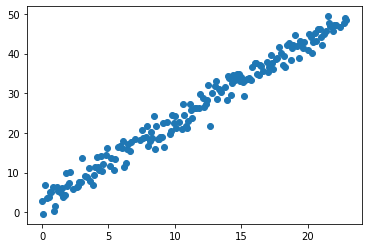

In [15]:
plt.scatter(xtrain, ytrain)

**Q3.** According to the ploting, the data is linear.


It is Supervised because the data labeled.

**Q4.**  (TODO)
The various metrics used to optimize error are :
* Gradient Descent
* Newton
* .

The various metrics used to evaluate the results of the prediction are :
* Mean Squared Error(MSE)
* Mean-Absolute-Error(MAE)
* .

**Q5.** 


Create a function `grad()` to compute the necessary gradients of the cost function. 


In [16]:
m = data.shape[0]

# calculate gradient
def grad(theta,X,y):
    m=X.shape[0]
    dJ = 2/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

Similarly, calculate the cost function `cost()`, also known as objective function, which can be expressed as the sum of the squared errors, as follows

In [17]:
def cost(theta,X,y):
    m=X.shape[0]
    J = np.sum((X.dot(theta)-y)**2,axis=0)[0]
    return J/m



Armijo function for linear search the learning rate

In [18]:
def armijo(X,y,theta,grad=grad,cost=cost):
    eps = .001
    eta = 10
    alpha =10e-15    
    gradient = grad(theta,X,y)
    phiprzero = -gradient.T.dot(gradient)
    phizero = cost(theta,X,y)
    while  cost(theta-alpha*gradient,X,y)<= alpha * phiprzero * eps + phizero :
        alpha*=eta
    return alpha/eta


We are ready to implement the Gradient Descent algorithm
The parametres :
* `X` features;
* `y` labels;
* `learning_rate` learning rate for parametres update;
* `epochs` max iteration of gradient descent update;
* `TOL` is a tolerance, i.e a maximum difference between the values of the parameters between iterations so it can be stated that the values converged;
* `use_armijo` True to opt the armijo rule to calculate the learning rate otherwise the algorithm will use the fixed learning rate.


The steps of this algorithm consists of:
* Obtain the gradients of the cost function according the actual value of the parameters;
* Calculate the cost to keep track of it;
* Update the parameters;

In [28]:
def GD(X,y,learning_rate = 0.001,epochs=1000,TOL=1e-7,use_armijo = False):
    theta = np.array([[0]]*X.shape[1])
    print(theta)
    theta_history = [theta]
    J_history = [cost(theta,X,y)]
    
    thetanew = theta
    print(f'epoch \t Cost(J,X,y) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad(theta,X,y)
        J = cost(theta,X,y)
        if use_armijo:learning_rate= armijo(X,y,theta)
        thetanew = theta - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum(dJ**2) < TOL:
            print('Convergence achieved.')
            break
        theta = thetanew

    return thetanew,theta_history,J_history

In [29]:
# theta,theta_history,J_history = GD(X,y,use_armijo=1)
# plt.scatter(data.x.values, y)
# Y_pred = X.dot(theta)
# plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color="red") # predicted
# plt.show()

Next, evaluate the Gradient Descent to determine the optimum set of parameters for 4 models (α = 0.001, 0.002, 0.003 and apply
Armijo’s learning rate);

In [30]:
models = []
models.append( GD(Xtrain,ytrain,learning_rate = 0.001))
models.append( GD(Xtrain,ytrain,learning_rate = 0.002))
models.append( GD(Xtrain,ytrain,learning_rate = 0.003))
models.append( GD(Xtrain,ytrain,use_armijo=1))

[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	851.5715	
  100	 5.6131	
  200	 5.4656	
  300	 5.3320	
  400	 5.2111	
  500	 5.1016	
  600	 5.0024	
  700	 4.9126	
  800	 4.8313	
  900	 4.7576	
[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	851.5715	
  100	 5.4669	
  200	 5.2121	
  300	 5.0032	
  400	 4.8319	
  500	 4.6914	
  600	 4.5762	
  700	 4.4818	
  800	 4.4044	
  900	 4.3409	
[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	851.5715	
  100	 5.3344	
  200	 5.0040	
  300	 4.7587	
  400	 4.5766	
  500	 4.4414	
  600	 4.3410	
  700	 4.2665	
  800	 4.2112	
  900	 4.1701	
[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	851.5715	
  100	 5.2808	
  200	 4.8885	
  300	 4.6217	
  400	 4.4404	
  500	 4.3164	
  600	 4.2318	
  700	 4.1742	
  800	 4.1351	
  900	 4.1085	


**Q6.** Drawing the fit line for the 4 models;

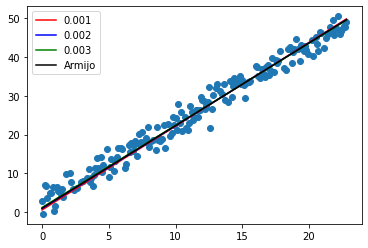

In [117]:
plt.scatter(xtrain, ytrain)

colors = ['red' , 'blue', "green","black"]
labels = ['0.001','0.002','0.003','Armijo']
for label,color,model in zip(labels,colors,models):
  theta = model[0]
  Y_pred = Xtrain.dot(theta)
  plt.plot([min(xtrain), max(xtrain)], [min(Y_pred), max(Y_pred)], color=color,label = label) # predicted
plt.legend()
plt.show()

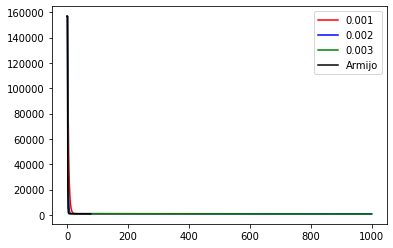

In [118]:
colors = ['red' , 'blue', "green","black"]
labels = ['0.001','0.002','0.003','Armijo']
for label,color,model in zip(labels,colors,models):
  J_history = model[2]
  plt.plot(J_history, color=color,label = label) # predicted
plt.legend()
plt.show()

**Q7.** Generalization error   (TODO)

In [31]:
for model in models:
    theta =model[0]
    print(cost(theta,Xtest,ytest))

5.003035114325729
4.527450063065023
4.338600906157043
4.287943744340155


**Q8.** Estimate generalization error (bias-variance)

**Q9.**

Q10

Q11

Q12

Q13

**Q14** 

### **Second Part**

In [32]:
data = pd.read_csv("data4.csv")

data= data.sample(frac=1)

print(data.shape)

(240, 2)


Spliting to traing and testing

In [121]:
y=data.y.values.reshape(-1,1)
x=data["x"].values.reshape(-1,1)


trainingSplit = int(.8 * data.shape[0])


xtrain = x[:trainingSplit]
ytrain = y[:trainingSplit] 
xtest = x[trainingSplit:]
ytest = y[trainingSplit:]

**Q1.**

**q1.**

**1.1.** The data contain 2 features `x` and `y`.

In [122]:
print(*data.columns)

x y


**1.2.**  The size of training set is **192**, the size of testing size is **48**.









In [123]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(192, 1) (192, 1)
(48, 1) (48, 1)


**1.3.** According to the ploting, The data is polynomial.

The data is Supervided : There is no missing data because the size of features equal the size of labels

**1.4.** bellow the describtion of our dataset :

 feature| mean | median | min | max
--- | --- | --- | --- | ---
x | -0.1|-0.1 |-24|23.8
y | 193.31| 157.39|-67.13|578.49

In [33]:
data.describe()

,x,y
count,240.000000,240.000000
mean,-0.100000,193.313566
std,13.885244,172.459213
min,-24.000000,-67.135789
25%,-12.050000,41.201270
50%,-0.100000,157.391379
75%,11.850000,324.378494
max,23.800000,578.496869


***q2.***

Using `matplotlib.scatter` to plot our **2D** dataset as scatters.

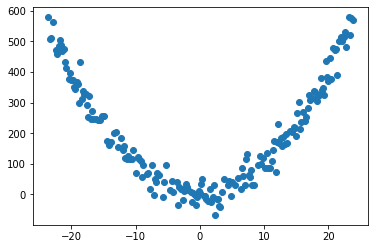

In [125]:
plt.scatter(xtrain, ytrain)


***q3.*** As showen in the figure above. Our dataset is polynomial of degree 2.

The nature of the dataset is **supervised** because the data is labeled.

***q4.*** Different metrics : (TODO)


**Q2.** Create the tranformation `tf` which take the initial features and the degree and give the new features according to pylinomial transformation of given degree.

we will use the same gradient descent implimentated in part 1.

In [126]:
def tf(x,deg):
  X=np.ones((len(x),1))
  for i in range(1,deg+1):
    X = np.concatenate((X,x**i),axis=1)
  return X

Apply the tranformation for degree = 2

In [139]:
Xtrain =tf(xtrain,deg=2)
Xtest =tf(xtest,deg=2)
X =tf(x,deg=2)
print(X.shape)

(240, 3)


**Q.3**  According to the plot, we assume that the polynomial degree is 2 because the drawing function is parabola.

**Q4.** Fiting the model;

[[0]
 [0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	13226351.3185	
Convergence achieved.


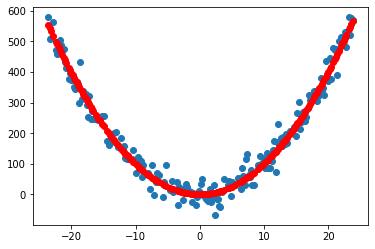

In [128]:

theta,theta_history,J_history = GD(Xtrain,ytrain,use_armijo=1)
plt.scatter(xtrain, ytrain)
Y_pred = Xtrain.dot(theta)
plt.scatter(xtrain, Y_pred, color="red") # predicted
plt.show()

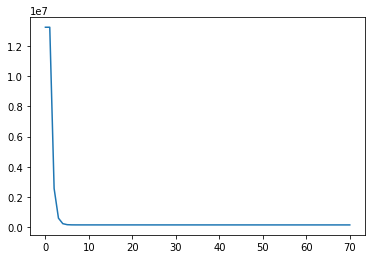

In [129]:
plt.plot(J_history)


### PART3

**Q1.** 

**Q2.** 

In [ ]:
ynorm = y.copy()
maxy = np.max(y)
miny = np.min(y)
ynorm = (y-miny)/(maxy - miny) 


In [141]:
def sigmoid(z): return 1 / (1 + np.e**(-z))
m = data.shape[0]

# calculate gradient
def grad2(theta,X,y):
    y_hat = sigmoid(np.dot(X, theta))
    dJ = 1/m*np.sum((y_hat-y)*X,axis=0).reshape(-1,1)
    return dJ
def cost2(theta,X, y):         
    z = np.dot(X, theta)
    predict_1 = y * np.log(sigmoid(z))
    predict_0 = (1 - y) * np.log(1 - sigmoid(z))
    return -sum(predict_1 + predict_0) / len(X)

def LR(X,y,learning_rate = 0.001,epochs=1000,TOL=1e-7,use_armijo = False):
    theta = np.array([[0]]*X.shape[1])
    print(theta)
    theta_history = [theta]
    J_history = [cost2(theta,X,y)]
    
    thetanew = theta
    print(f'epoch \t Cost2(J,X,y) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]}\t')
        dJ = grad2(theta,X,y)
        J = cost2(theta,X,y)
        if use_armijo:learning_rate= armijo(X,y,theta,grad2,cost2)
        thetanew = theta - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta)**2) < TOL:
            print('Convergence achieved.')
            break
        theta = thetanew

    return thetanew,theta_history,J_history

(240, 3) (240, 1)
[[0]
 [0]
 [0]]
epoch 	 Cost2(J,X,y) 	
    0	[0.69314718]	
Convergence achieved.


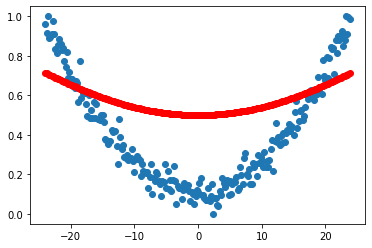

In [143]:
print(X.shape,ynorm.shape)
theta,theta_history,J_history = LR(X,ynorm,use_armijo=1)
plt.scatter(x, ynorm)
Y_pred = sigmoid( X.dot(theta))
plt.scatter(x,Y_pred, color="red") 
plt.show()

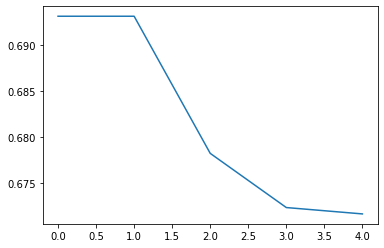

In [144]:
plt.plot(J_history)